In [3]:
import pandas as pd

In [4]:
url = "heart.csv"
df = pd.read_csv(url, delimiter=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preparation / Cleaning

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
duplicates = df[df.duplicated(keep=False)]
duplicates_sorted = duplicates.sort_values(by=list(df.columns))
duplicates_sorted.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

# EDA

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


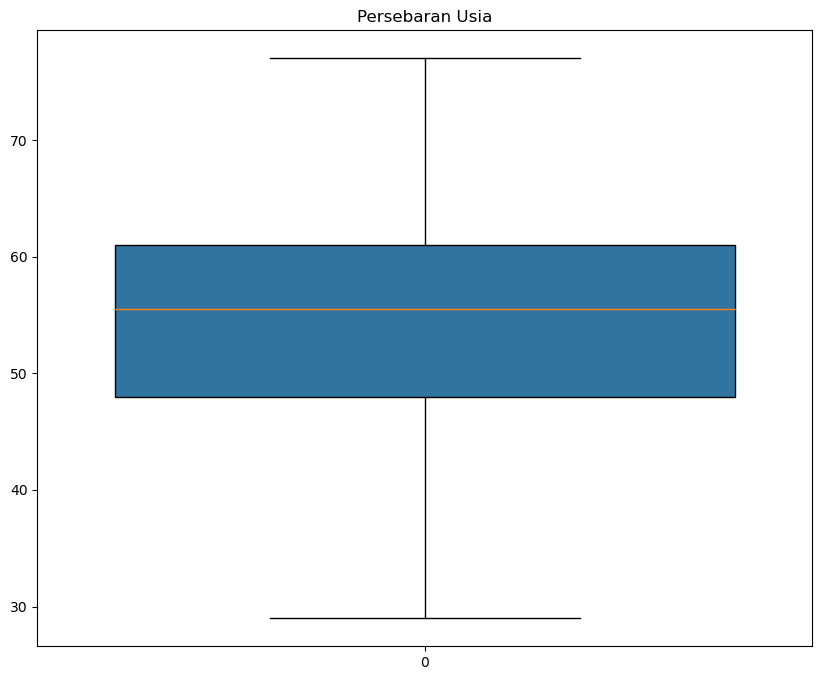

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.boxplot(df['age'],patch_artist=True, boxprops={'facecolor':'#3274A1'}, widths=0.8)
plt.title("Persebaran Usia")
plt.xticks([1], ['0'])
plt.show()

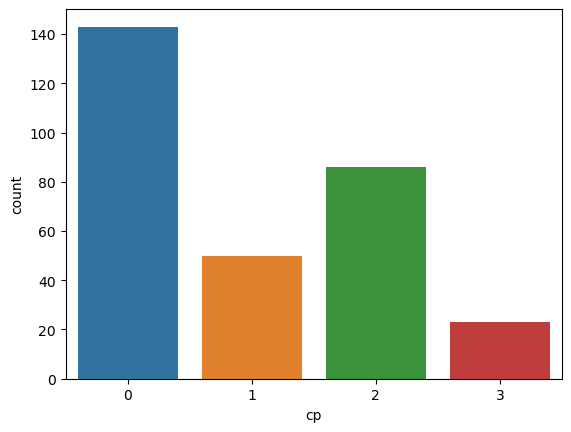

In [19]:
import seaborn as sns
sns.countplot(x='cp', data=df)
plt.show()

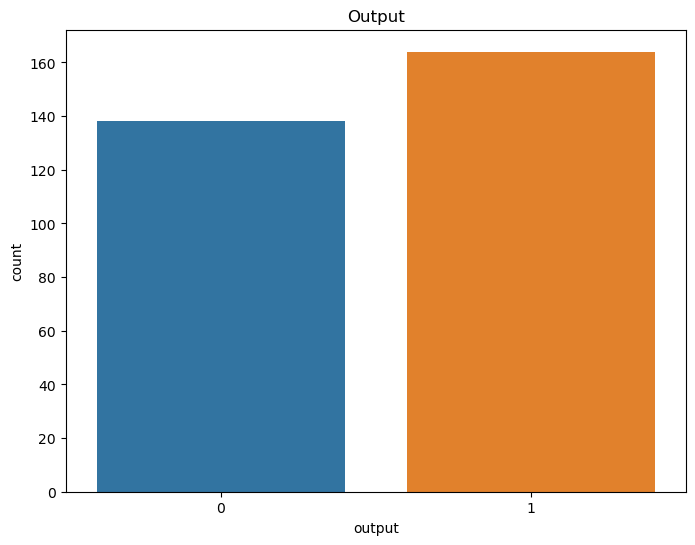

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='output', data=df)
plt.title('Output')
plt.show()

In [15]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


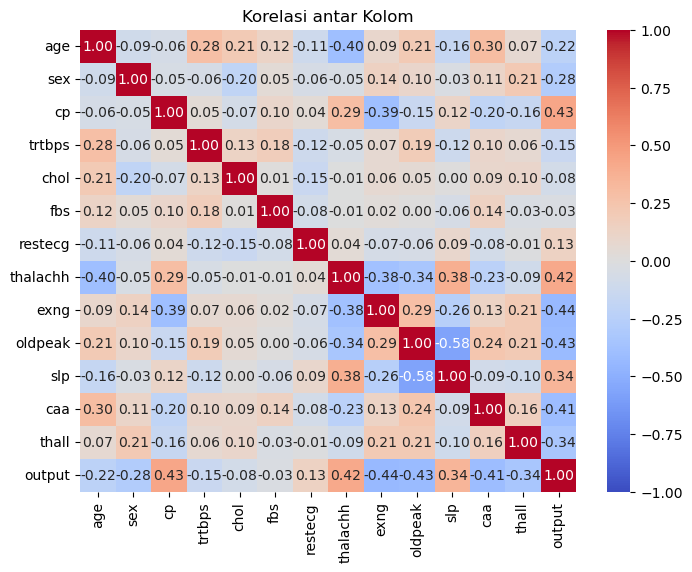

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')

plt.title('Korelasi antar Kolom')

plt.show()

# Compare two different variables and provide short analysis (cp and chol, and output and age)

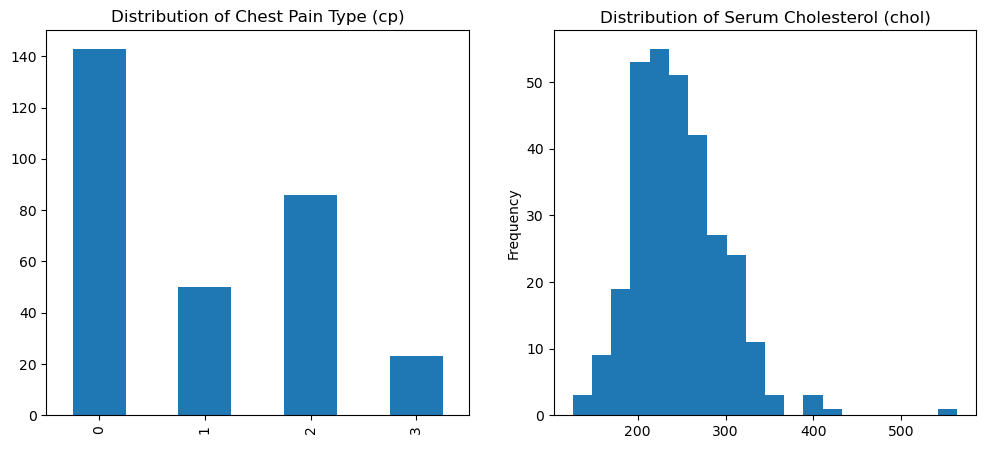

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
df['cp'].value_counts().sort_index().plot(kind='bar', ax=axs[0])
axs[0].set_title('Distribution of Chest Pain Type (cp)')

df['chol'].plot(kind='hist', bins=20, ax=axs[1])
axs[1].set_title('Distribution of Serum Cholesterol (chol)')

plt.show()

/var/folders/9q/xjqpb26518s1vvw5v5d2nx8c0000gq/T/ipykernel_17947/1232907536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 0]['age'], color='green', kde=True)
/var/folders/9q/xjqpb26518s1vvw5v5d2nx8c0000gq/T/ipykernel_17947/1232907536.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



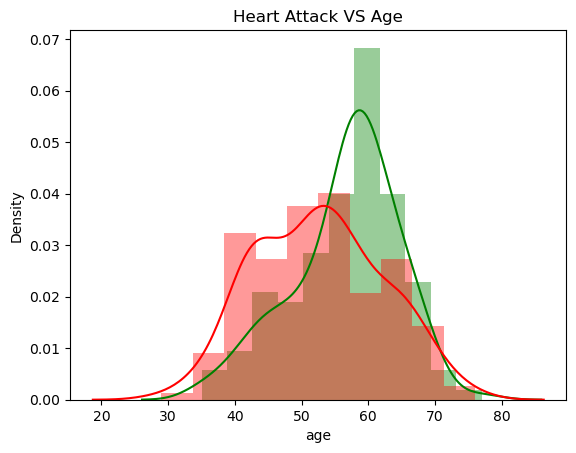

In [26]:
sns.distplot(df[df['output'] == 0]['age'], color='green', kde=True)
sns.distplot(df[df['output'] == 1]['age'], color='red', kde=True)
plt.title("Heart Attack VS Age")
plt.show()

# Create model for analysis (Classification)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(scaled_X_train,y_train)

LogisticRegression(random_state=0)

In [32]:
y_pred = classifier.predict(scaled_X_test)
print(y_pred)

[0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1]


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Confusion matrix
[[25  4]
 [ 6 26]]
Accuracy score: 0.8360655737704918


K-Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
knn_model

KNeighborsClassifier(metric='euclidean')

In [36]:
knn_model.fit(scaled_X_train, y_train)
y_predKNN = knn_model.predict(scaled_X_test)
print(y_predKNN)

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [37]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_predKNN))

accuracy = accuracy_score(y_test, y_predKNN)
print("Accuracy score:", accuracy)

Confusion matrix
[[28  1]
 [ 4 28]]
Accuracy score: 0.9180327868852459


Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(scaled_X_train, y_train)

GaussianNB()

In [39]:
y_predG = gaussian.predict(scaled_X_test) 
print(y_predG)

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1]


In [40]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_predG))

accuracy = accuracy_score(y_test, y_predG)
print("Accuracy score:", accuracy)

Confusion matrix
[[27  2]
 [ 5 27]]
Accuracy score: 0.8852459016393442


Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(scaled_X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_rf = rf_model.predict(scaled_X_test)
print(y_pred_rf)

[0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [48]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred_rf))

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy score:", accuracy)

Confusion matrix
[[26  3]
 [ 5 27]]
Accuracy score: 0.8688524590163934


# Create short conclusion about the modeling results

K-Nearest Neighbors (KNN) outperformed the other models in terms of its accuracy, achieving the highest accuracy score of 91.80%.
Followed by Gaussian Naive Bayes and Random Forest also performed well, with accuracy scores of 88.52% and 86.89%, respectively.
Logistic Regression, while decent, had the lowest accuracy among the models.